# Import library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Exploring the data

In [4]:
data = pd.read_csv("BankChurners.csv")

In [5]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


### Data size

In [6]:
data.shape

(10127, 23)

### Check data types

In [7]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

### Check null

In [8]:
display(data.isnull().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [9]:
for column in data.columns:
    if data[column].dtypes == object:
        print(column, len(data[data[column] == "Unknown"]))

Attrition_Flag 0
Gender 0
Education_Level 1519
Marital_Status 749
Income_Category 1112
Card_Category 0


In [10]:
print(data['Education_Level'].value_counts())
print('===================================================')
print(data['Marital_Status'].value_counts())
print('===================================================')
print(data['Income_Category'].value_counts())

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


In [11]:
data['Education_Level'] = data['Education_Level'].replace('Unknown', 'Graduate')
data['Income_Category'] = data['Income_Category'].replace('Unknown', 'Less than $40K')

In [12]:
data = data.drop(data[data.Marital_Status == "Unknown"].index)
print(data.shape)

(9378, 23)


In [13]:
print(data['Education_Level'].value_counts())
print('===================================================')
print(data['Marital_Status'].value_counts())
print('===================================================')
print(data['Income_Category'].value_counts())

Graduate         4306
High School      1859
Uneducated       1378
College           939
Post-Graduate     473
Doctorate         423
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    4341
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
$120K +            680
Name: Income_Category, dtype: int64


### Count values

In [14]:
data.nunique()

CLIENTNUM                                                                                                                             9378
Attrition_Flag                                                                                                                           2
Customer_Age                                                                                                                            45
Gender                                                                                                                                   2
Dependent_count                                                                                                                          6
Education_Level                                                                                                                          6
Marital_Status                                                                                                                           3
Income_Category            

### Drop unimportant columns

Xóa 2 cột cuối

In [15]:
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True, axis = 1)
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace = True, axis = 1)

Xóa cột ID (không có ý nghĩa)

In [16]:
data.drop(['CLIENTNUM'], inplace = True, axis = 1)

Xóa những cột chỉ có một giá trị (không cần thiết trong trường hợp này)

In [17]:
for column in data.columns:
    if data[column].nunique() == 1:
        data.drop(column, inplace = True, axis = 1)

### Replace data

Thay thế một số dữ liệu dạng object

In [18]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [19]:
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Existing Customer', 0)
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Attrited Customer', 1)

Đối với các dữ liệu object không có tính cao thấp (giới tính, tình trạng hôn nhân), ta sử dụng phương pháp one hot encode để xử lý

In [20]:
one_hot_Gender = pd.get_dummies(data['Gender'])
one_hot_Marital_Status = pd.get_dummies(data['Marital_Status'])

In [21]:
data = data.drop('Gender',axis = 1)
data = data.drop('Marital_Status',axis = 1)

In [22]:
data = data.join(one_hot_Gender)
data = data.join(one_hot_Marital_Status)
data

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,F,M,Divorced,Married,Single
0,0,45,3,High School,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,1,0
1,0,49,5,Graduate,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1
2,0,51,3,Graduate,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,1,0
4,0,40,3,Uneducated,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,1,0
5,0,44,2,Graduate,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,0,56,1,Graduate,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,1,0,0,0,1
10122,0,50,2,Graduate,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,1,0,0,1
10123,1,41,2,Graduate,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,1,1,0,0
10124,1,44,1,High School,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,0,0,1,0


In [23]:
data['Education_Level'].value_counts()

Graduate         4306
High School      1859
Uneducated       1378
College           939
Post-Graduate     473
Doctorate         423
Name: Education_Level, dtype: int64

In [24]:
data['Education_Level'] = data['Education_Level'].replace('Uneducated', 0)
data['Education_Level'] = data['Education_Level'].replace('High School', 1)
data['Education_Level'] = data['Education_Level'].replace('College', 2)
data['Education_Level'] = data['Education_Level'].replace('Graduate', 3)
data['Education_Level'] = data['Education_Level'].replace('Post-Graduate', 4)
data['Education_Level'] = data['Education_Level'].replace('Doctorate', 5)

In [25]:
data['Income_Category'].value_counts()

Less than $40K    4341
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
$120K +            680
Name: Income_Category, dtype: int64

In [26]:
data['Income_Category'] = data['Income_Category'].replace('Less than $40K', 0)
data['Income_Category'] = data['Income_Category'].replace('$40K - $60K', 1)
data['Income_Category'] = data['Income_Category'].replace('$60K - $80K', 2)
data['Income_Category'] = data['Income_Category'].replace('$80K - $120K', 3)
data['Income_Category'] = data['Income_Category'].replace('$120K +', 4)

In [27]:
data['Card_Category'].value_counts()

Blue        8753
Silver       503
Gold         104
Platinum      18
Name: Card_Category, dtype: int64

In [28]:
data['Card_Category'] = data['Card_Category'].replace('Blue', 0)
data['Card_Category'] = data['Card_Category'].replace('Silver', 1)
data['Card_Category'] = data['Card_Category'].replace('Gold', 2)
data['Card_Category'] = data['Card_Category'].replace('Platinum', 3)

In [29]:
data.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Dependent_count               int64
Education_Level               int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
F                             uint8
M                             uint8
Divorced                      uint8
Married                       uint8
Single                        uint8
dtype: object

In [30]:
data.describe(percentiles = [.1, .25, .5, .75, .97, .999])

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,F,M,Divorced,Married,Single
count,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000
mean,0.159736,46.386436,2.330881,2.203242,1.191619,0.081574,35.987417,3.816699,2.342610,2.458307,8566.994882,1163.218597,7403.776285,0.760776,4378.854553,64.675944,0.711972,0.276411,0.530817,0.469183,0.079761,0.499787,0.420452
std,0.366380,8.099109,1.300375,1.346006,1.346958,0.329586,8.042508,1.548543,1.008347,1.109462,9047.603603,814.169500,9047.384762,0.221295,3403.311538,23.537658,0.239279,0.276288,0.499076,0.499076,0.270938,0.500027,0.493658
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,36.000000,1.000000,0.000000,0.000000,0.000000,25.000000,2.000000,1.000000,1.000000,1757.000000,0.000000,674.000000,0.531000,1489.000000,33.000000,0.451700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,1.000000,0.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2543.250000,396.750000,1312.000000,0.630000,2139.250000,45.000000,0.581250,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,46.000000,2.000000,3.000000,1.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4489.500000,1278.000000,3434.500000,0.737000,3866.000000,67.000000,0.700000,0.177000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,52.000000,3.000000,3.000000,2.000000,0.000000,41.000000,5.000000,3.000000,3.000000,10948.750000,1783.000000,9763.000000,0.859000,4731.000000,80.000000,0.818000,0.505000,1.000000,1.000000,0.000000,1.000000,1.000000
97%,1.000000,62.000000,5.000000,5.000000,4.000000,1.000000,52.000000,6.000000,4.000000,4.000000,34516.000000,2517.000000,33042.070000,1.251690,14961.900000,114.000000,1.167000,0.837000,1.000000,1.000000,1.000000,1.000000,1.000000
99.9%,1.000000,65.623000,5.000000,5.000000,4.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.236693,17205.597000,130.000000,2.500000,0.983000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualize the data

In [50]:
for column in data.columns:
    if data[column].dtypes != object:
        fig = px.histogram(data, x=column, nbins=100,  color_discrete_sequence=['deepskyblue'],width=800, height=600)
        fig.show()

In [51]:
fig = ff.create_distplot([data['Customer_Age']], group_labels = ['Customer_Age'], colors = ['turquoise'], curve_type='normal')
fig.show()

In [93]:
P = [np.mean(data[data.Card_Category == 0].Attrition_Flag), np.mean(data[data.Card_Category == 1].Attrition_Flag), 
     np.mean(data[data.Card_Category == 2].Attrition_Flag), np.mean(data[data.Card_Category == 3].Attrition_Flag)]
fig = px.bar(x = ['Blue', 'Silver', 'Gold', 'Plantinum'], y = P, color_discrete_sequence= ['teal'], labels=dict(x="Categories", y="Flag"), width=800, height=600)
fig.show()

In [94]:
P = [np.mean(data[data.Education_Level == 0].Attrition_Flag), np.mean(data[data.Education_Level == 1].Attrition_Flag), 
     np.mean(data[data.Education_Level == 2].Attrition_Flag), np.mean(data[data.Education_Level == 3].Attrition_Flag),
     np.mean(data[data.Education_Level == 4].Attrition_Flag), np.mean(data[data.Education_Level == 5].Attrition_Flag)]
fig = px.bar(x = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'], y = P, color_discrete_sequence= ['teal'], labels=dict(x="Education_Level", y="Flag"), width=800, height=600)
fig.show()

In [91]:
P = [np.mean(data[data.Single == 1].Attrition_Flag), np.mean(data[data.Married == 1].Attrition_Flag), 
     np.mean(data[data.Divorced == 1].Attrition_Flag)]
fig = px.bar(x = ['Single', 'Married', 'Divorced'], y = P, color_discrete_sequence= ['teal'], labels=dict(x="Marital Status", y="Flag"), width=800, height=600)
fig.show()

In [92]:
P = [np.mean(data[data.M == 1].Attrition_Flag), np.mean(data[data.F == 1].Attrition_Flag)]
fig = px.bar(x = ['Male', 'Female'], y = P, color_discrete_sequence= ['teal'], labels=dict(x="Gender", y="Flag"), width=800, height=600)
fig.show()

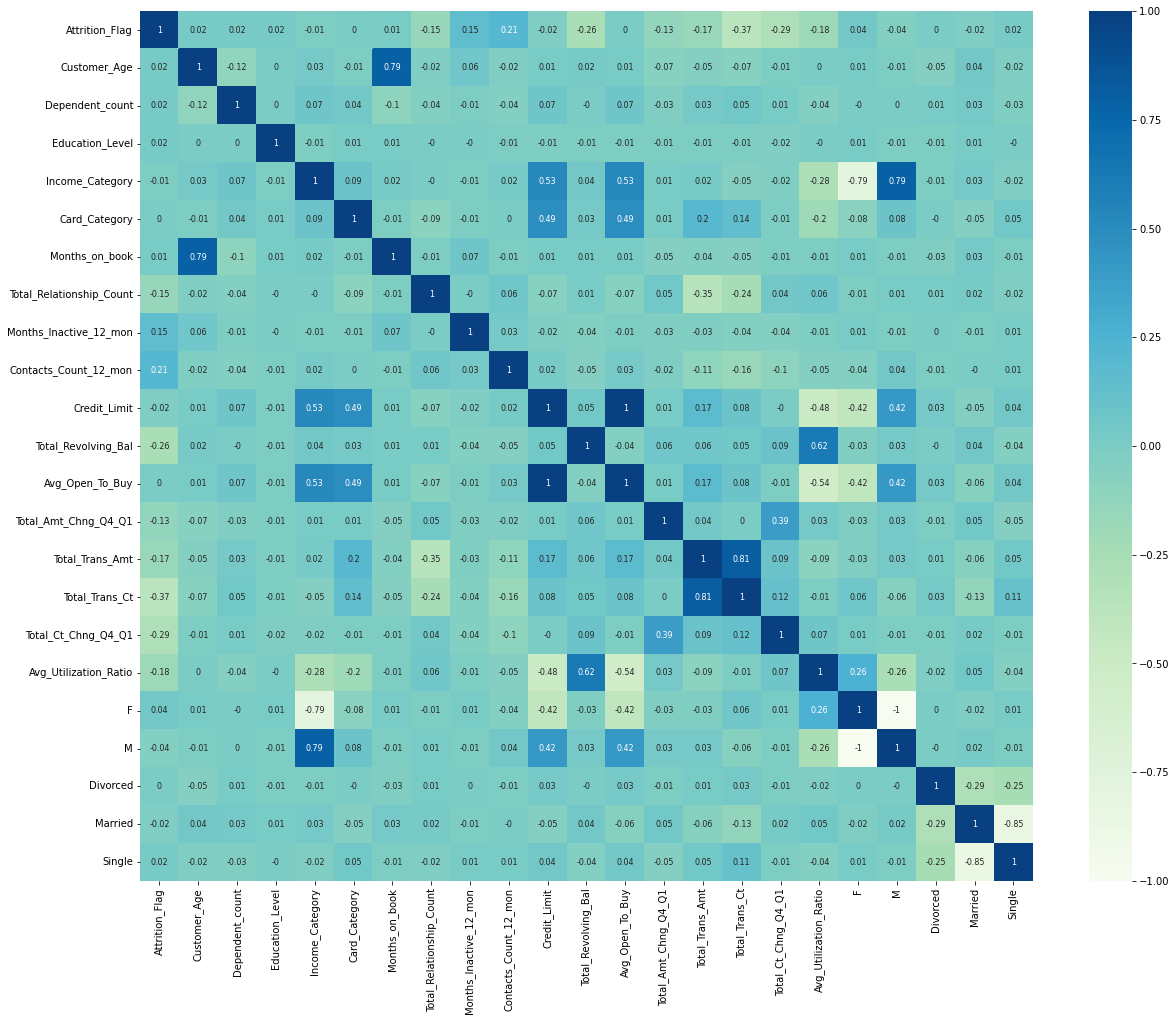

In [103]:
plt.figure(figsize=(20,16))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='GnBu', annot=True, 
            annot_kws={"size": 8}, vmin=-1, vmax=1);

In [104]:
data.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Dependent_count               int64
Education_Level               int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
F                             uint8
M                             uint8
Divorced                      uint8
Married                       uint8
Single                        uint8
dtype: object

In [109]:
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Existing Customer', 0)
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Attrited Customer', 1)

In [110]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
iris_lm=ols('Attrition_Flag ~  Customer_Age + Dependent_count + Education_Level + Income_Category + Card_Category + Months_on_book + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Credit_Limit + Total_Revolving_Bal + Avg_Open_To_Buy + Total_Amt_Chng_Q4_Q1 + Total_Trans_Amt + Total_Trans_Ct + Total_Ct_Chng_Q4_Q1 + Avg_Utilization_Ratio + F + M + Divorced + Married +Single', data=data).fit() #Specify C for Categorical
sm.stats.anova_lm(iris_lm, typ=2)

,sum_sq,df,F,PR(>F)
Customer_Age,0.020363,1.0,0.241828,6.229003e-01
Dependent_count,1.856124,1.0,22.042664,2.704479e-06
Education_Level,0.259035,1.0,3.076207,7.947833e-02
Income_Category,1.713449,1.0,20.348297,6.533714e-06
Card_Category,0.977061,1.0,11.603225,6.611450e-04
Months_on_book,0.041808,1.0,0.496492,4.810632e-01
Total_Relationship_Count,36.238691,1.0,430.357620,1.690195e-93
Months_Inactive_12_mon,17.089052,1.0,202.943423,1.423093e-45
Contacts_Count_12_mon,19.612702,1.0,232.913372,5.814085e-52
Credit_Limit,27.186269,1.0,322.854329,5.355142e-71


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LOR = LogisticRegression(solver='liblinear', random_state=0)
y = np.array(data['Attrition_Flag'])
all_Data =data.drop(['Attrition_Flag'],axis=1)
X = all_Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state=25)
LOR.fit(X_train, y_train)
LOR.score(X_test, y_test)

0.8923240938166311

In [125]:
from sklearn.metrics import confusion_matrix
y_pred = LOR.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[755,  36],
       [ 65,  82]])

In [126]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LOR, X, y, cv=10, scoring='accuracy').mean())

0.8705392840645075


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



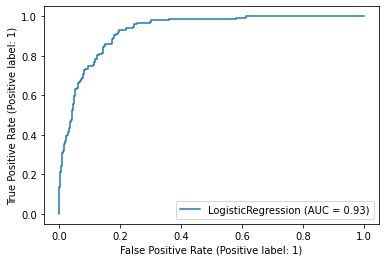

In [127]:
from sklearn.metrics import plot_roc_curve
LOR_disp = plot_roc_curve(LOR, X_test, y_test)
plt.show()